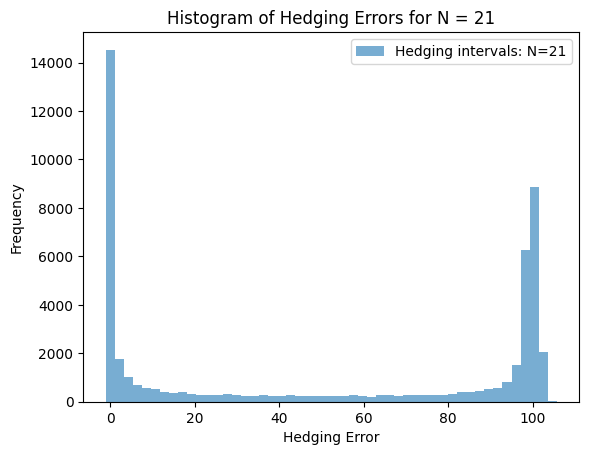

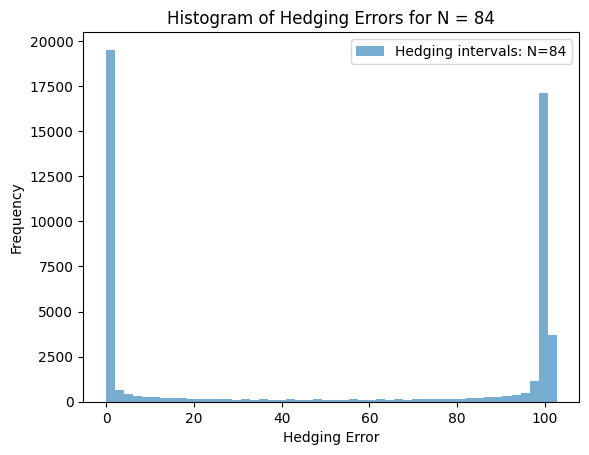

In [1]:
## Python 3.12.0

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Part 1 21 hedging intervals

# Parameters
S0 = 100       # initial stock price
K = 100        # strike price
sigma = 0.2    # volatility
r = 0.05       # risk-free rate
T = 1 / 12     # time to maturity (1 month)
N_paths = 50000  # number of simulation paths
N = 21         # hedging intervals (daily)

# Black-Scholes delta calculation
def delta(S, K, T, t, sigma, r):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    return norm.cdf(d1)

# Simulate stock price paths
def simulate_paths(S0, T, r, sigma, N, N_paths):
    dt = T / N
    paths = np.zeros((N_paths, N + 1))
    paths[:, 0] = S0
    for t in range(1, N + 1):
        Z = np.random.standard_normal(N_paths)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Hedging simulation
def hedging_simulation(N):
    paths = simulate_paths(S0, T, r, sigma, N, N_paths)
    dt = T / N
    errors = []
    for i in range(N_paths):
        hedged_portfolio = 0
        for t in range(N):
            time = t * dt
            phi_t = delta(paths[i, t], K, T, time, sigma, r)
            hedged_portfolio = phi_t * paths[i, t]
        final_hedging_value = hedged_portfolio
        payoff = max(paths[i, -1] - K, 0)
        errors.append(final_hedging_value - payoff)
    return errors

# Run hedging simulation for N = 21
errors = hedging_simulation(N)

# Plotting histogram of hedging errors
plt.hist(errors, bins=50, alpha=0.6, label=f'Hedging intervals: N={N}')
plt.xlabel('Hedging Error')
plt.ylabel('Frequency')
plt.title('Histogram of Hedging Errors for N = 21')
plt.legend()
plt.show()

# Part 2 84 hedging intervals

# Parameters
S0 = 100       # initial stock price
K = 100        # strike price
sigma = 0.2    # volatility
r = 0.05       # risk-free rate
T = 1 / 12     # time to maturity (1 month)
N_paths = 50000  # number of simulation paths
N = 84         # hedging intervals (daily)

# Black-Scholes delta calculation
def delta(S, K, T, t, sigma, r):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    return norm.cdf(d1)

# Simulate stock price paths
def simulate_paths(S0, T, r, sigma, N, N_paths):
    dt = T / N
    paths = np.zeros((N_paths, N + 1))
    paths[:, 0] = S0
    for t in range(1, N + 1):
        Z = np.random.standard_normal(N_paths)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Hedging simulation
def hedging_simulation(N):
    paths = simulate_paths(S0, T, r, sigma, N, N_paths)
    dt = T / N
    errors = []
    for i in range(N_paths):
        hedged_portfolio = 0
        for t in range(N):
            time = t * dt
            phi_t = delta(paths[i, t], K, T, time, sigma, r)
            hedged_portfolio = phi_t * paths[i, t]
        final_hedging_value = hedged_portfolio
        payoff = max(paths[i, -1] - K, 0)
        errors.append(final_hedging_value - payoff)
    return errors

# Run hedging simulation for N = 84
errors = hedging_simulation(N)

# Plotting histogram of hedging errors
plt.hist(errors, bins=50, alpha=0.6, label=f'Hedging intervals: N={N}')
plt.xlabel('Hedging Error')
plt.ylabel('Frequency')
plt.title('Histogram of Hedging Errors for N = 84')
plt.legend()
plt.show()

**Interpretation for N = 21:**
This histogram shows the distribution of hedging errors for a set of intervals (N = 21) and highlights several key points:

1. **High Frequency of Low Errors**: There is a significant peak around the zero hedging error mark. This indicates that in many instances, the hedging strategy is nearly perfect, with minimal deviation between the hedged value and the target.

2. **Right Skew with Outliers**: There’s a secondary peak on the right side of the histogram, around the 100 mark. This suggests that while most hedging errors are low, there are some instances where the error is much higher, indicating a few cases where the hedge was not effective. This right tail could be due to extreme market movements or model assumptions that fail under certain conditions.

3. **Bimodal Distribution**: The histogram appears to have a bimodal distribution, with two peaks: one near zero and another closer to 100. This could imply the existence of two distinct regimes or types of hedging environments – one where hedging is effective and errors are low, and another where hedging struggles to mitigate risk, resulting in high errors.

4. **Implications**: For practical applications, this bimodal behavior suggests that while the strategy is effective in many cases (low errors), there are specific situations (likely extreme cases) where the hedging does not perform well. Further investigation might be needed to understand the conditions leading to these high-error instances, potentially improving the hedging model or adapting the strategy for those cases.

Overall, this histogram suggests that the hedging strategy performs well most of the time but has some significant outliers, which could be important to address to reduce the frequency of large hedging errors.

**Interpretation for N = 84:**
This histogram, depicting the hedging errors for \( N = 84 \), shares some similarities with the previous one (for \( N = 21 \)) but with a few notable differences due to the increased number of hedging intervals.

1. **Increase in Low Error Frequency**: The peak around zero hedging error is even more pronounced compared to the previous histogram. This suggests that as the number of hedging intervals increases, the strategy more consistently minimizes hedging errors, resulting in a higher frequency of near-zero errors.

2. **Right Skew with a Secondary Peak**: Similar to the histogram for \( N = 21 \), there is a secondary peak near the 100 mark, indicating that some instances still result in high hedging errors. However, this secondary peak is less pronounced relative to the dominant zero-error peak, implying that with more frequent adjustments (i.e., more intervals), the occurrence of extreme hedging errors is somewhat reduced but still present.

3. **Bimodal Distribution**: The distribution remains bimodal, with two distinct peaks around zero and 100. The increase in hedging intervals has amplified the frequency of low errors while reducing (though not eliminating) the frequency of high errors. This suggests that more frequent hedging adjustments generally improve hedging effectiveness but may still be insufficient for certain market conditions that lead to large errors.

4. **Implications**: The results indicate that increasing the number of hedging intervals helps the strategy perform better in most situations (fewer large errors and more occurrences of near-zero errors). However, there are still scenarios where the hedging strategy encounters significant errors, potentially due to rapid market changes or model limitations.

In summary, this histogram suggests that the hedging strategy is generally more effective with \( N = 84 \) intervals, yielding lower errors in most cases. However, there remain occasional high-error instances, which could be targeted for further refinement or model adjustments.